**Monthly milk production: pounds per cow. Jan 1962 - Dec 1975**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')
df.index = pd.to_datetime(df.index)
df

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
...,...
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0
1975-10-01 01:00:00,827.0


<AxesSubplot:xlabel='Month'>

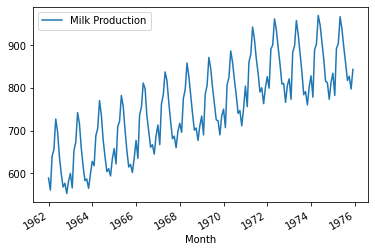

In [3]:
df.plot()

In [4]:
scaler = MinMaxScaler()

array = []
train_data = []
train_labels = []

for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [5]:
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12*k:12*(k+1)])
        train_labels.append(array[12*(k+1)])
        k+=1
    except:
        break

In [6]:
train_data = np.squeeze(train_data)
train_data.shape

(14, 12)

In [7]:
train_labels = np.array(train_labels)
train_labels.shape

(13, 1)

In [8]:
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

(13, 1, 12)

In [9]:
train_data[1]

array([[0.11298077, 0.03125   , 0.24038462, 0.28846154, 0.45432692,
        0.39182692, 0.25721154, 0.15384615, 0.07211538, 0.08173077,
        0.02884615, 0.10817308]])

In [10]:
train_labels[1]

array([0.18028846])

In [11]:
model = Sequential()

model.add(LSTM(250,input_shape=(1,12)))
model.add(Dropout(0.5))


model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250)               263000    
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3012      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [12]:
E = 1000

H = model.fit(train_data,train_labels,epochs=E)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2284
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2288
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2241
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1942
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1942
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1304
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1485
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1502
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0649
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1146
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0578
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0654
Epoch 13/1000
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.0187
Epoch 104/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0468
Epoch 105/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0348
Epoch 106/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0559
Epoch 107/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0353
Epoch 108/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0348
Epoch 109/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0530
Epoch 110/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 111/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 112/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 113/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 114/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0224
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0244
Epoch 205/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0421
Epoch 206/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0210
Epoch 207/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0198
Epoch 208/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 209/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 210/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0238
Epoch 211/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 212/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0266
Epoch 213/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0220
Epoch 214/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0210
Epoch 215/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0345
Epoch 216/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0326
Epoch 306/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0232
Epoch 307/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 308/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 309/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 310/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0315
Epoch 311/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 312/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 313/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 314/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0219
Epoch 315/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 316/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0214
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0279
Epoch 407/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0227
Epoch 408/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 409/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0181
Epoch 410/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 411/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0314
Epoch 412/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 413/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0261
Epoch 414/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 415/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 416/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0271
Epoch 417/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0231
Epoch 508/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 509/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 510/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0155
Epoch 511/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 512/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 513/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 514/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 515/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 516/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 517/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 518/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 609/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 610/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0168
Epoch 611/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 612/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 613/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0225
Epoch 614/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 615/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 616/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 617/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 618/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 619/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 710/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 711/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 712/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 713/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0197
Epoch 714/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 715/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 716/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 717/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 718/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 719/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 720/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0100
Epoch 721/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 811/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 812/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 813/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 814/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 815/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 816/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 817/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 818/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 819/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 820/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0139
Epoch 821/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 912/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 913/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 914/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 915/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 916/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 917/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 918/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 919/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 920/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 921/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 922/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 923/1000
1/1 [=======================

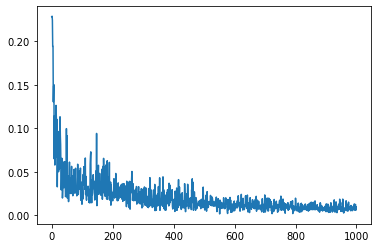

In [13]:
epochs = range(0,E)
loss = H.history['loss']
plt.plot(epochs,loss)

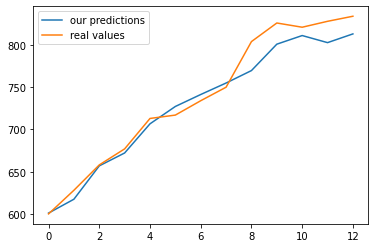

In [14]:
preds = scaler.inverse_transform(model.predict(train_data))
plt.plot(range(0,13),preds,label='our predictions')
plt.plot(range(0,13),scaler.inverse_transform(train_labels),label='real values')
plt.legend()

### Now we have trained our model which takes previous 12 month data as input and predicts next month milk production. We will carry forward this method and predict production for next whole year.

In [15]:
seed = array[-12:]
seed

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [16]:
seed.shape

(12, 1)

In [17]:
for _ in range(12):
    curr_12_months = seed[-12:]
    curr_12_months = np.squeeze(curr_12_months)
    curr_12_months = np.expand_dims(curr_12_months,0)
    curr_12_months = np.expand_dims(curr_12_months,0)
    pred = model.predict(curr_12_months)
    seed = np.append(seed,pred)

In [18]:
seed

array([0.67548077, 0.55048077, 0.81490385, 0.84134615, 0.99278846,
       0.92307692, 0.82451923, 0.73317308, 0.63461538, 0.65865385,
       0.58653846, 0.69711538, 0.64067119, 0.65035671, 0.67009032,
       0.68873799, 0.7025193 , 0.69544423, 0.6827594 , 0.6686129 ,
       0.66619569, 0.65977538, 0.65859455, 0.6586687 ])

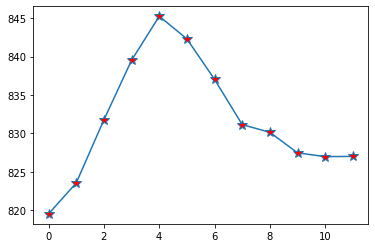

In [19]:
next_year_prediction = scaler.inverse_transform(seed[-12:].reshape(-1,1))
plt.plot(range(0,12),next_year_prediction,marker='*',markerfacecolor='red',markersize=10)